In [99]:
#pip install import-ipynb

In [100]:
import import_ipynb

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from Kauan_Delaunay import*

In [102]:
lpontos

[[2, 10],
 [3, 3],
 [3.7, 7.3],
 [4, 10],
 [4.5, 6],
 [5.6, 7.3],
 [6, 11],
 [7, 2],
 [8, 5]]

In [103]:
dl

[[array([ 2., 10.]), array([3., 3.]), array([3.7, 7.3])],
 [array([3.7, 7.3]), array([ 4., 10.]), array([ 2., 10.])],
 [array([ 4., 10.]), array([3.7, 7.3]), array([4.5, 6. ])],
 [array([3.7, 7.3]), array([3., 3.]), array([4.5, 6. ])],
 [array([ 4., 10.]), array([4.5, 6. ]), array([5.6, 7.3])],
 [array([ 2., 10.]), array([ 4., 10.]), array([ 6., 11.])],
 [array([ 4., 10.]), array([5.6, 7.3]), array([ 6., 11.])],
 [array([7., 2.]), array([3., 3.]), array([4.5, 6. ])],
 [array([5.6, 7.3]), array([ 6., 11.]), array([8., 5.])],
 [array([4.5, 6. ]), array([5.6, 7.3]), array([8., 5.])],
 [array([8., 5.]), array([7., 2.]), array([4.5, 6. ])]]

In [104]:
def min_spnng_tree(lpontos,dlnay):
    tup_tri=[tuple([tuple(t1) for t1 in triang]) for triang in dlnay] #lista de triangs de tuplas
    viz={tuple(tuple(array)):[] for array in lpontos}
    for triang in dlnay: # vizinhos de cada vértice
        for i,array in enumerate(triang):
            for j in range(1,3): 
                dist= np.linalg.norm(array-triang[i-j])
                viz[tuple(tuple(array))].append([(array,triang[i-j]),dist])
    lgrupos=[{tuple(ponto)} for ponto in lpontos]
    ql_grp={tuple(ponto):{tuple(ponto)} for ponto in lpontos}
    ligs={key:set() for key in viz.keys()}
    while len(lgrupos)>1:
        lgrupos,ligs,viz= agrupar(lgrupos,ligs,viz)
    return ligs 

In [105]:
def agrupar(lgrupos, ligs, dviz_g): 
    """
    lgrupos é lista de sets
    ligs é dict das ligações individuais na MST
    d_viz é dict dos vizinhos de cada grupo, #keys são sets de duplas e values sets
    
    pegar a menor distância, add-la ao ligs, add pontos ao grupo desfaznedo os anteriores,
    computar novos dviz_g
    """
    def tup(g):
        if len(g)==1:
            return tuple(g)[0]
        else: return tuple(g)
    ql_grp={} # dict, ponto apontando para grupo
    for grupo in lgrupos:
        for ponto in grupo: ql_grp[ponto]=grupo
    for grupo in lgrupos:
        new_grp=set()
        dists=sorted(dviz_g[tup(grupo)],key=lambda x:x[1])
        removidos=[]
        menor_d=dists[0]
        a0=tuple(menor_d[0][0])
        a1=tuple(menor_d[0][1]) #ponto de outro grupo que está mais perto 
        while a1 not in new_grp:
            ligs[a0].add(a1) #a1 e a0 se conectam
            ligs[a1].add(a0)

            lgrupos.remove(ql_grp[a1]) #grupos antigos são removidos
            lgrupos.remove(ql_grp[a0])

            new_grp={p for p in ql_grp[a0].union(ql_grp[a1])} # novo grupo a ser considerado
            lgrupos.append(new_grp)

            dviz_g[tup(new_grp)]=[v for v in dviz_g[tup(ql_grp[a0])] if tuple(v[0][1]) not in ql_grp[a1]]
            dviz_g[tup(new_grp)].extend([v for v in dviz_g[tup(ql_grp[a1])] if tuple(v[0][1]) not in ql_grp[a0]])
            dviz_g.pop(tup(ql_grp[a0]))
            #dviz_g.pop(tup(ql_grp[a1]))
            removidos.append(tup(ql_grp[a1]))
            
            dists=sorted(dviz_g[tup(ql_grp[a1])],key=lambda x:x[1]) #distâncias do grupo seguinte
            for ponto in new_grp: # todos os pontos apontam para seu grupo
                ql_grp[ponto]=new_grp
            menor_d=dists[0]
            a0=tuple(menor_d[0][0])
            a1=tuple(menor_d[0][1]) #ponto de fora do grupo do a1 original que está mais perto
        for g in removidos:
            dviz_g.pop(g)
    return (lgrupos,ligs,dviz_g)

In [106]:
min_spnng_tree(lpontos,dl)

{(2, 10): {(4.0, 10.0)},
 (3, 3): {(4.5, 6.0)},
 (3.7, 7.3): {(4.0, 10.0), (4.5, 6.0)},
 (4, 10): {(2.0, 10.0), (3.7, 7.3), (6.0, 11.0)},
 (4.5, 6): {(3.0, 3.0), (3.7, 7.3), (5.6, 7.3)},
 (5.6, 7.3): {(4.5, 6.0), (8.0, 5.0)},
 (6, 11): {(4.0, 10.0)},
 (7, 2): {(8.0, 5.0)},
 (8, 5): {(5.6, 7.3), (7.0, 2.0)}}

In [107]:
lpontos=[[3,3],[4.5,6],[4,10],[3.7,7.3],[7,2],[5.6,7.3],[6,11],[2,10],[8,5]]        
inct=incr_triangles(lpontos)
dl=delaunay(inct)

In [115]:
def plot_tree(ligs):
    for chave in ligs:
        for p in ligs[chave]:
            plt.plot((chave[0],p[0]),(chave[1],p[1]))
            ligs[p].discard(chave)
    plt.axis('equal')
    plt.title("Minnimum Spanning Tree")
    plt.grid()
    plt.show()


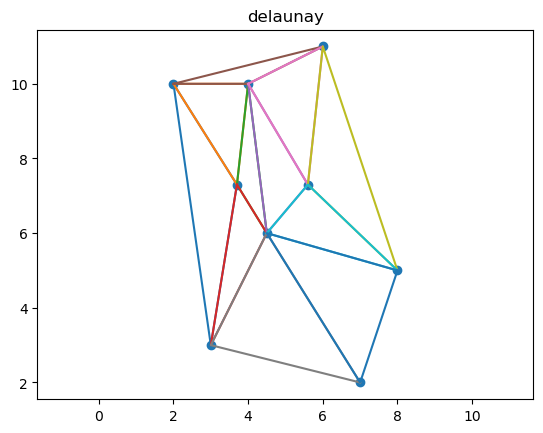

In [116]:
dlplotar(lpontos)

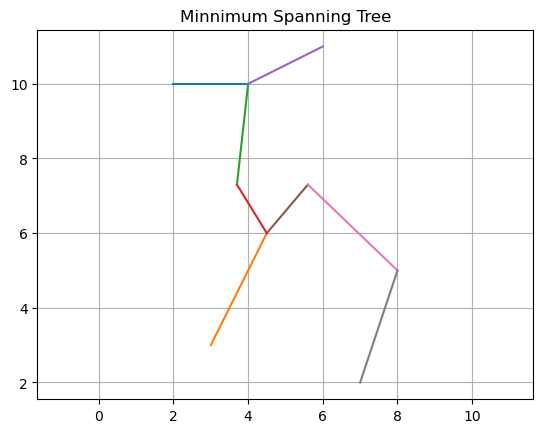

In [117]:
plot_tree(min_spnng_tree(lpontos,dl))